# COGS 109 Final Project Report
### Molly Varozza, Daniil Magaril, Amy Li, Jason Lee

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Saving our dataset
data = pd.read_csv("imports-85.csv")

print(data.shape)
print(type(data))

(205, 27)
<class 'pandas.core.frame.DataFrame'>


### City MPG vs Engine Size

In [3]:
# Duration on product-related page vs whether they purchased something or not 
cityMPG = data['23']
engineSize = data['16']

# Separating data into train and test sets
cMPG_train, cMPG_test, eS_train, eS_test = train_test_split(cityMPG, engineSize, test_size = .2)

Text(0, 0.5, 'City MPG')

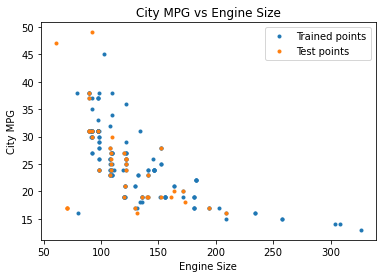

In [4]:
X = eS_train
Y = cMPG_train

# initial data plot
train_points, = plt.plot(X, Y, '.')
test_points, = plt.plot(eS_test, cMPG_test, '.')

# creating labels
plt.legend([train_points, test_points], ["Trained points", "Test points"])
plt.title("City MPG vs Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("City MPG")

In [5]:
# First Order Model
A1 = np.column_stack((np.ones((X.shape)), X))
w1 = np.linalg.lstsq( A1, Y, rcond = None)[0]

A1_test = np.column_stack((np.ones((eS_test.shape)), eS_test))

y_pred1 = np.matmul(A1, w1)
y_pred1_test = np.matmul(A1_test,w1)


In [6]:
# Second Order Model
A2 = np.column_stack((np.ones((X.shape)), X, np.square(X)))
w2 = np.linalg.lstsq( A2, Y, rcond = None)[0]

A2_test = np.column_stack((np.ones((eS_test.shape)), eS_test, np.square(eS_test)))

y_pred2 = np.matmul(A2, w2)
y_pred2_test = np.matmul(A2_test,w2)

In [7]:
# Logarithmic Model
A3 = np.column_stack((np.ones((X.shape)), np.log(X)))
w3 = np.linalg.lstsq( A3, Y, rcond = None)[0]

A3_test = np.column_stack((np.ones((eS_test.shape)), np.log(eS_test)))

y_pred3 = np.matmul(A3, w3)
y_pred3_test = np.matmul(A3_test, w3)

In [8]:
# Use matrices generated above to create models

xRange = np.linspace(min(X), max(X))
ones = np.ones(len(xRange))
squares = np.square(xRange)
logs = np.log(xRange)

# first order
A1 = np.column_stack((ones, xRange))
yplot1 = np.matmul(A1, w1)

# second order
A2 = np.column_stack((ones, xRange, squares))
yplot2 = np.matmul(A2, w2)

# y = A + B * log(x)
A3 = np.column_stack((ones, logs))
yplot3 = np.matmul(A3, w3)

Text(0, 0.5, 'City MPG')

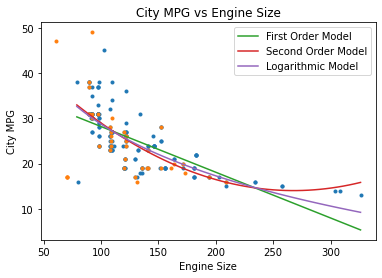

In [9]:
# Plot data alongside created models
plt.plot(X, Y, '.')
plt.plot(eS_test, cMPG_test, '.')

# plot models
linModel, = plt.plot(xRange, yplot1)
quadModel, = plt.plot(xRange, yplot2)
logModel, = plt.plot(xRange, yplot3)

# add labels
plt.legend([linModel, quadModel, logModel], ["First Order Model", "Second Order Model", "Logarithmic Model"])
plt.title("City MPG vs Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("City MPG")

In [10]:
#Calcualte and print errors
SSELinear = sum(np.square(y_pred1_test - cMPG_test))
SSEQuad = sum(np.square(y_pred2_test - cMPG_test))
SSELog = sum(np.square(y_pred3_test - cMPG_test))
print('Linear SSE:', SSELinear, '\nQuadratic SSE:', SSEQuad, '\nLogarithmic SSE:', SSELog)

Linear SSE: 1831.0495119802138 
Quadratic SSE: 1852.3765739301934 
Logarithmic SSE: 1869.71493404432


### City MPG vs Curb Weight

In [11]:
# cityMPG vs curb weight
cityMPG = data['23']
curbWeight = data['13']

# separate data into train and test sets
cMPG1_train, cMPG1_test, cw_train, cw_test = train_test_split(cityMPG, curbWeight, test_size = .2)

Text(0, 0.5, 'City MPG')

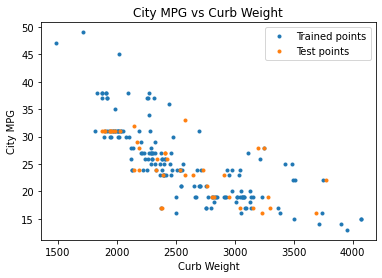

In [12]:
X1 = cw_train
Y1 = cMPG1_train

# initial data plot
train_points, = plt.plot(X1, Y1, '.')
test_points, = plt.plot(cw_test, cMPG1_test, '.')

# adding labels
plt.legend([train_points, test_points], ["Trained points", "Test points"])
plt.title("City MPG vs Curb Weight")
plt.xlabel("Curb Weight")
plt.ylabel("City MPG")

In [13]:
# First Order Model
A4 = np.column_stack((np.ones((X1.shape)), X1))
w4 = np.linalg.lstsq( A4, Y1, rcond = None)[0]

A4_test = np.column_stack((np.ones((cw_test.shape)), cw_test))

y_pred4 = np.matmul(A4, w4)
y_pred4_test = np.matmul(A4_test,w4)


In [14]:
# Second Order Model
A5 = np.column_stack((np.ones((X1.shape)), X1, np.square(X1)))
w5 = np.linalg.lstsq( A5, Y1, rcond = None)[0]

A5_test = np.column_stack((np.ones((cw_test.shape)),cw_test, np.square(cw_test)))

y_pred5 = np.matmul(A5, w5)
y_pred5_test = np.matmul(A5_test, w5)

In [15]:
#Use matrices generated above to create models

xRange = np.linspace(min(X1), max(X1))
ones = np.ones(len(xRange))
squares = np.square(xRange)

A4 = np.column_stack((ones, xRange))
yplot1 = np.matmul(A4, w4)
A5 = np.column_stack((ones, xRange, squares))
yplot2 = np.matmul(A5, w5)

Text(0, 0.5, 'City MPG')

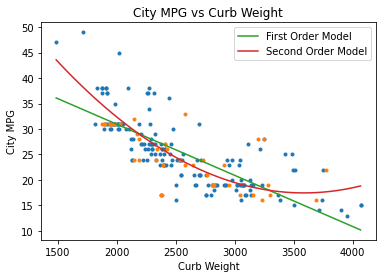

In [16]:
# Plot data alongside created models
plt.plot(X1,Y1, '.')
plt.plot(cw_test, cMPG1_test, '.')

# plotting models
linModel, = plt.plot(xRange, yplot1)
quadModel, = plt.plot(xRange, yplot2)

# adding labels
plt.legend([linModel, quadModel], ["First Order Model", "Second Order Model"])
plt.title("City MPG vs Curb Weight")
plt.xlabel("Curb Weight")
plt.ylabel("City MPG")

In [18]:
# Calcualte and print errors
SSELinear = sum(np.square(y_pred4_test - cMPG1_test))
SSEQuad = sum(np.square(y_pred5_test - cMPG1_test))
print('Linear SSE:', SSELinear, '\nQuadratic SSE:', SSEQuad)

Linear SSE: 697.4271130333441 
Quadratic SSE: 649.3276069952661


### Number of Cylinders vs City MPG

In [19]:
# Num cylinders vs City MPG
cityMPG = data['23']
numCylinders = data['15.5']

# separate data into train and test sets
cMPG2_train, cMPG2_test, nc_train, nc_test = train_test_split(cityMPG, numCylinders, test_size = .2)

Text(0, 0.5, 'City MPG')

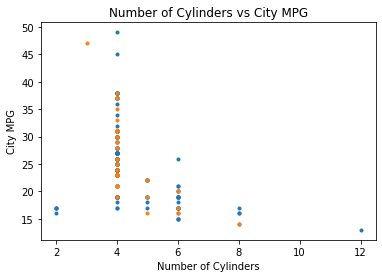

In [20]:
X2 = nc_train
Y2 = cMPG2_train

# initial data plot
plt.plot(X2, Y2, '.')
plt.plot(nc_test,cMPG2_test, '.')

# adding labels
plt.title("Number of Cylinders vs City MPG")
plt.xlabel("Number of Cylinders")
plt.ylabel("City MPG")

In [21]:
#First order model
A6 = np.column_stack((np.ones((X2.shape)), X2))
w6 = np.linalg.lstsq( A6, Y2, rcond = None)[0]

A6_test = np.column_stack((np.ones((nc_test.shape)), nc_test))

y_pred6 = np.matmul(A6, w6)
y_pred6_test = np.matmul(A6_test,w6)


In [22]:
#Second order model
A7 = np.column_stack((np.ones((X2.shape)), X2, np.square(X2)))
w7 = np.linalg.lstsq( A7, Y2, rcond = None)[0]

A7_test = np.column_stack((np.ones((nc_test.shape)), nc_test, np.square(nc_test)))
y_pred7 = np.matmul(A7, w7)
y_pred7_test = np.matmul(A7_test,w7)


In [23]:
#Logarithmic Model
A8 = np.column_stack((np.ones((X2.shape)), np.log(X2)))
w8 = np.linalg.lstsq( A8, Y2, rcond = None)[0]

A8_test = np.column_stack((np.ones((nc_test.shape)), np.log(nc_test)))
y_pred8 = np.matmul(A8, w8)
y_pred8_test = np.matmul(A8_test,w8)


In [24]:
#Use matrices generated above to create models
xRange = np.linspace(min(X2), max(X2))
ones = np.ones(len(xRange))
squares = np.square(xRange)
logs = np.log(xRange)

# first order model
A6 = np.column_stack((ones, xRange))
yplot1 = np.matmul(A6, w6)

# second order model
A7 = np.column_stack((ones, xRange, squares))
yplot2 = np.matmul(A7, w7)

# y = A + B * log(x)
A8 = np.column_stack((ones, logs))
yplot3 = np.matmul(A8, w8)

Text(0, 0.5, 'City MPG')

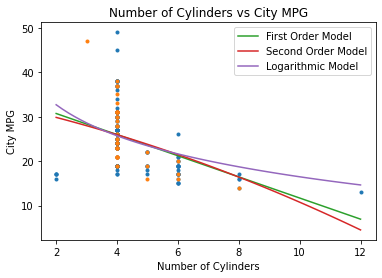

In [25]:
# Plot data alongside created models
plt.plot(X2,Y2, '.')
plt.plot(nc_test,cMPG2_test, '.')

# plot models
linModel, = plt.plot(xRange, yplot1)
quadModel, = plt.plot(xRange, yplot2)
logModel, = plt.plot(xRange, yplot3)

# adding labels
plt.legend([linModel, quadModel, logModel], ["First Order Model", "Second Order Model", "Logarithmic Model"])
plt.title("Number of Cylinders vs City MPG")
plt.xlabel("Number of Cylinders")
plt.ylabel("City MPG")

In [26]:
# Calcualte and print errors
SSELinear = sum(np.square(y_pred6_test - cMPG2_test))
SSEQuad = sum(np.square(y_pred7_test - cMPG2_test))
SSELog = sum(np.square(y_pred8_test - cMPG2_test))
print('Linear SSE:', SSELinear, '\nQuadratic SSE:', SSEQuad, '\nLogarithmic SSE:', SSELog)

Linear SSE: 1448.0241020978347 
Quadratic SSE: 1474.2962232769369 
Logarithmic SSE: 1484.3606294156575


### Engine Size and Curb Weight vs City MPG (Multivariate)

1. MPG = w0 + w1 \* log(Engine Size) + w2 \* Curb Weight
2. MPG = w0 + w1 \* Engine Size + w2 \* Curb Weight
3. MPG = w0 + w1 \* Engine Size + w2 \* Curb Weight + w3 \* Engine Size *\ Curb Weight


Text(0, 0.5, 'Engine Size')

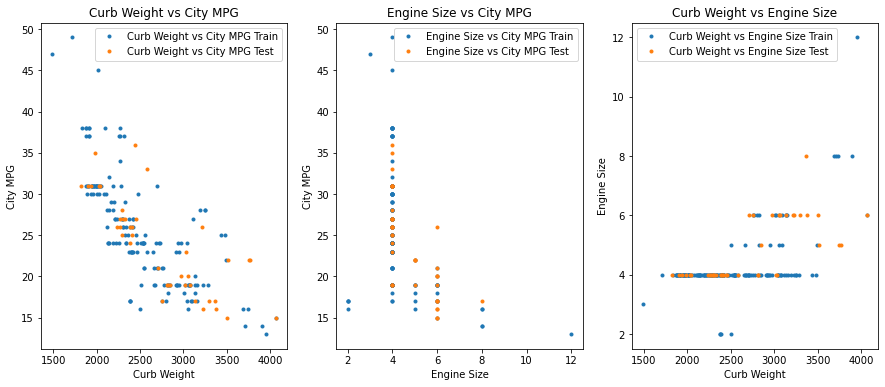

In [27]:
# Engine Size and Curb Weight vs City MPG
cityMPG = data['23']
cw = data['13']
eS = data['15.5']

cMPG3_train, cMPG3_test, eS1_train, eS1_test, cw_train, cw_test = train_test_split(cityMPG, eS, cw, test_size = .2)

X1=eS1_train
X2=cw_train
Y=cMPG3_train

# curb weight vs city MPG
fig, axs = plt.subplots(1,3)
fig.set_size_inches(15,6)
axs[0].plot(cw_train, cMPG3_train, '.')
axs[0].plot(cw_test, cMPG3_test, '.')
axs[0].legend(["Curb Weight vs City MPG Train", "Curb Weight vs City MPG Test"])

# engine size vs city MPG
axs[1].plot(eS1_train, cMPG3_train, '.')
axs[1].plot(eS1_test, cMPG3_test, '.')
axs[1].legend(["Engine Size vs City MPG Train", "Engine Size vs City MPG Test"])

# curb weight vs engine size
axs[2].plot(cw_train, eS1_train, '.')
axs[2].plot(cw_test, eS1_test, '.')
axs[2].legend(["Curb Weight vs Engine Size Train", "Curb Weight vs Engine Size Test"])

# adding labels
axs[0].set_title("Curb Weight vs City MPG")
axs[0].set_xlabel("Curb Weight")
axs[0].set_ylabel("City MPG")
axs[1].set_title("Engine Size vs City MPG")
axs[1].set_xlabel("Engine Size")
axs[1].set_ylabel("City MPG")
axs[2].set_title("Curb Weight vs Engine Size")
axs[2].set_xlabel("Curb Weight")
axs[2].set_ylabel("Engine Size")

In [28]:
#Model 1 Calculations
A9 = np.column_stack((np.ones((X1.shape)),np.log(X1),X2))
w9 = np.linalg.lstsq( A9, Y, rcond = None)[0]

A9_test = np.column_stack((np.ones((eS1_test.shape)), np.log(eS1_test), cw_test))

y_pred9 = np.matmul(A9, w9)
y_pred9_test = np.matmul(A9_test, w9)

In [29]:
#Model 2 Calculations
A10 = np.column_stack((np.ones((X1.shape)),X1,X2))
w10 = np.linalg.lstsq( A10, Y, rcond = None)[0]

A10_test = np.column_stack((np.ones((eS1_test.shape)), eS1_test, cw_test))

y_pred10 = np.matmul(A10, w10)
y_pred10_test = np.matmul(A10_test, w10)

In [30]:
#Model 3 Calculations
A11 = np.column_stack((np.ones((X1.shape)),X1,X2, X1*X2))
w11 = np.linalg.lstsq( A11, Y, rcond = None)[0]

A11_test = np.column_stack((np.ones((eS1_test.shape)), eS1_test, cw_test, eS1_test * cw_test))

y_pred11 = np.matmul(A11, w11)
y_pred11_test = np.matmul(A11_test, w11)

In [31]:
SSEModel1 = sum(np.square(y_pred9_test - cMPG3_test))
SSEModel2 = sum(np.square(y_pred10_test - cMPG3_test))
SSEModel3 = sum(np.square(y_pred11_test - cMPG3_test))
print('Model 1 SSE: '+ str(SSEModel1))
print('Model 2 SSE: '+ str(SSEModel2))
print('Model 3 SSE: '+ str(SSEModel3))

Model 1 SSE: 660.5405177559676
Model 2 SSE: 641.9300916389468
Model 3 SSE: 633.1601042794211
